# Project: Multi-Objective Optimization

**Deadline**: <u>November 4, 2025 at 10:00 p.m.</u> (SGT)

## Guidelines for Submission

### A. Submission Package
1. Submit **one ZIP file per group** named **`EC_Group_<xy>.zip`**, where `<xy>` is your group number.  
   *Example:* `EC_Group_22.zip`
2. The ZIP must contain the following files:
   - **`CEG5302_Group_Project_<xy>.ipynb`** — your main Jupyter Notebook  
   - **`report_<xy>.pdf`** — your 2–3 page report  
   *Example:* `CEG5302_Group_Project_22.ipynb` and `report_22.pdf`

### B. General Requirements
1. Each group has **four members** and submits **only one** ZIP.  
2. The Jupyter Notebook must clearly display **Python 3 code** and its **generated results**.
3. The notebook must be **fully executable top-to-bottom** to reproduce all figures directly from code.  
   Do **not** insert external image files; all plots/images must be produced during execution.  
   <span style="color:red;">Files with the `.py` extension are not accepted.</span>
4. Before submitting, **rerun the entire notebook** to confirm it executes without errors.  
   Code that cannot be executed or produces errors will result in **point deductions**.

### C. File-Naming Examples
- Group 07 → `EC_Group_07.zip` → contains `CEG5302_Group_Project_07.ipynb`, `report_07.pdf`  


In [16]:
import numpy as np

## Part 1. Continuous Multi-Objective Optimization
In this part, we have implemented the two-objective ZDT3 problem [1] and the vehicle crashworthiness design problem [2], and provided examples on how to use them. <u>**Your task is to implement <span style="color:blue;">NSGA-II</span> and use it to solve these two problems**</u>.

[1] Zitzler, E., Deb, K., & Thiele, L. (2000). Comparison of multiobjective evolutionary algorithms: Empirical results. Evolutionary computation, 8(2), 173-195.

[2] Liao, X., Li, Q., Yang, X., Zhang, W., & Li, W. (2008). Multiobjective optimization for crash safety design of vehicles using a stepwise regression model. Structural and multidisciplinary optimization, 35, 561-569.

### Introduction to a Two-Objective Test Problem: ZDT3 
The ZDT test suite [1] is a well-known set of benchmark problems in multi-objective optimization. It was introduced by Zitzler, Deb, and Thiele in 2000 to evaluate the performance of multi-objective optimization algorithms. ZDT3 is one of the test problems in the ZDT test suite.

- Number of objectives: 2
- Number of decision variables: 30

$$
\begin{aligned}
&\mathrm{minimize} \left\{
\begin{array}{l}
f_1(\mathbf{x})=\mathbf{x} \\
f_2(\mathbf{x})=g(\mathbf{x}) h(\mathbf{x})
\end{array}\:,\right. \\
&\mathrm{where} \enspace g(\mathbf{x})=1+\frac{9}{n-1} \sum_{i=2}^n x_i, \\
& \qquad \enspace h(\mathbf{x})=1-\sqrt{f_1(\mathbf{x}) / g(\mathbf{x})}-\left(f_1(\mathbf{x}) / g(\mathbf{x})\right) \sin \left(10 \pi f_1(\mathbf{x})\right),\\
& \qquad \enspace 0 \leq x_i \leq 1, \enspace i=1,\ldots,n,.
\end{aligned}
$$

[1] E. Zitzler, K. Deb, and L. Thiele, Comparison of multiobjective evolutionary algorithms: Empirical results, Evolutionary computation, 2000, 8(2): 173-195.

In [17]:
class ZDT3():

    def __init__(self):
        self.name = 'ZDT3'
        self.n_obj = 2  # number of objectives
        self.n_var = 30  # number of decision variables

        self.lower = np.zeros(self.n_var)  # lower bound of decision variables
        self.upper = np.ones(self.n_var)  # upper bound of decision variables

    def evaluate(self, x):
        pop_size = len(x)
        f = np.zeros((pop_size, self.n_obj)) # for each chromosom, we have 2 objective function evals.
        f[:, 0] = x[:, 0]
        g = 1.0 + 9.0 * np.sum(x[:, 1:], axis=1) / (self.n_var - 1)
        h = 1 - np.power(
            f[:, 0] * 1.0 / g,
            0.5) - (f[:, 0] * 1.0 / g) * np.sin(10 * np.pi * f[:, 0])
        f[:, 1] = g * h

        return f

In [18]:
# Create an instance of ZDT3
prob = ZDT3()
print(f"Problem = {prob.name}")
print(f"Number of objectives = {prob.n_obj}")
print(f"Number of variables = {prob.n_var}")
print(f"Lower bounds = {prob.lower}")
print(f"Upper bounds = {prob.upper}")

Problem = ZDT3
Number of objectives = 2
Number of variables = 30
Lower bounds = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Upper bounds = [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [19]:
# Initialize a population with 1 solution and evaluate it
pop_size = 1
x = prob.lower + (prob.upper - prob.lower) * np.random.rand(
    pop_size, prob.n_var)

print(f"x: {x}")

f = prob.evaluate(x)
print(f"f(x) = {f}")


x: [[0.00844939 0.2175092  0.79912811 0.31837384 0.6820373  0.50814319
  0.6986167  0.16612896 0.27999982 0.07807395 0.98675865 0.73307166
  0.28236989 0.63961656 0.94892874 0.47047978 0.77043316 0.91219202
  0.27841969 0.96861788 0.14859436 0.57745764 0.85718725 0.44408594
  0.07085155 0.06332304 0.73076037 0.97851944 0.96695418 0.45292878]]
f(x) = [[0.00844939 5.74779186]]


In [20]:
# Initialize a population with 5 solutions and evaluate them
pop_size = 5
x = prob.lower + (prob.upper - prob.lower) * np.random.rand(
    pop_size, prob.n_var)


f = prob.evaluate(x)
print(f"f(x) = {f}")

f(x) = [[0.17688914 4.79354068]
 [0.68372298 2.86186406]
 [0.65551462 2.65528654]
 [0.58898341 4.15174216]
 [0.496195   3.13788355]]


### TODO: Implement NSGA-II and Solve ZDT3 (30 marks)

Your task is **to implement NSGA-II, use it to solve ZDT3, obtain the final population, and visualize the final population.** 

To help you get started, we have provided skeleton code for NSGA-II, which serves as a starting point for you to add your own implementation. Please note that you **should not modify the framework** we have given you. More precisely, edit the "TODO" parts and do not introduce other functions.  Additionally, we have also provided you with code to create instances of the NSGA2() and ZDT3() classes.

An example of the expected output is shown in the following figure, which displays the true Pareto front of ZDT3 (represented by red lines) and the final population obtained by NSGA-II (represented by grey circles). Your final solutions should be similar to these grey circles.

<img src="https://github.com/linjunhe/CEG5302-Projects/blob/main/NSGA2_ZDT3.png?raw=true" alt="ZDT3" width="40%">

It is crucial to ensure that your code runs successfully, as failing to do so may result in a zero mark for this task. If you face difficulties in implementing NSGA-II in this part, you can refer to available source codes online, such as [PlatEMO](https://github.com/BIMK/PlatEMO/blob/master/PlatEMO/Algorithms/Multi-objective%20optimization/NSGA-II/NSGAII.m) and [pymoo](https://github.com/anyoptimization/pymoo/blob/main/pymoo/algorithms/moo/nsga2.py), or seek assistance from ChatGPT.

In [ ]:
class NSGA2():
    def __init__(self, prob, pop_size=100, prob_cross=0.9, dist_index_cross=20, prob_mut=0.7):
        self.pop_size = pop_size
        #-----------BEGIN-----------#
        # TODO: Include other parameters you may use to create an 
        #       instance of NSGA2(), such as crossover probability 
        #       and mutation probability  
        #-----------END-----------#
        self.prob_cross = prob_cross
        self.dist_index_cross = dist_index_cross
        self.prob_mut = prob_mut
        self.prob = prob

    def initialize(self, prob):
        x = prob.lower + (prob.upper - prob.lower) * np.random.rand(
            self.pop_size, prob.n_var)
        return x
    
    def fitness_assignment(self, population, fitnesses):
        #-----------BEGIN-----------#
        # TODO: Implement non-dominated sorting and crowding distance
        # to assign non-domination rank and local crowding distance to each 
        # solution in the parent population, which will be used later in
        # tournament selection
        #-----------END-----------#
        def dominates(i, j):
            return all(fitnesses[i] <= fitnesses[j]) and any(fitnesses[i] < fitnesses[j])
        
        def non_dominated_sorting(population):
            rank = np.zeros(len(population))
            F = dict()
            F[1] = set()
            n = np.zeros(len(population))
            sets = dict()
            for p in range(len(population)):
                sets[p] = set()
                n[p] = 0
                for q in range(len(population)):
                    if dominates(p, q):
                        sets[p].add(q)
                    elif dominates(q, p):
                        n[p] += 1
                if n[p] == 0:
                    rank[p] = 1
                    F[1].add(p)
            i = 1
            while len(F[i]) > 0:
                Q = set()
                for p in F[i]:
                    for q in sets[p]:
                        n[q] -= 1
                        if n[q] == 0:
                            rank[q] = i + 1
                            Q.add(q)
                i += 1
                F[i] = Q
            return rank
        
        def crowding_distance():
            distance = np.zeros(len(population))
            for m in range(fitnesses.shape[1]):
                sorted_indices = np.argsort(fitnesses[:, m])
                distance[sorted_indices[0]] = float('inf')
                distance[sorted_indices[-1]] = float('inf')
                f_min = fitnesses[sorted_indices[0], m]
                f_max = fitnesses[sorted_indices[-1], m]
                for i in range(1, len(population) - 1):
                    distance[sorted_indices[i]] += (fitnesses[sorted_indices[i + 1], m] - fitnesses[sorted_indices[i - 1], m]) / (f_max - f_min)
            return distance
        
        rank = non_dominated_sorting(population)
        crowding_dist = crowding_distance()
        return rank, crowding_dist

    def tournament_selection(self, population, rank, crowding_distance):
        #-----------BEGIN-----------#
        # TODO: Implement tournament selection on parent population to  
        # construct a mating pool of size `pop_size` for crossover
        #-----------END-----------#
        mating_pool = []
        while len(mating_pool) < self.pop_size:
            # Randomly select two individuals for the tournament
            i, j = np.random.choice(len(population), size=2, replace=False)
            # Compare based on non-domination rank and crowding distance
            if (rank[i] < rank[j]) or \
               (rank[i] == rank[j] and crowding_distance[i] > crowding_distance[j]):
                mating_pool.append(population[i])
            else:
                mating_pool.append(population[j])
        return np.array(mating_pool)
        
    def crossover(self, pc, mating_pool):
        #-----------BEGIN-----------#
        # TODO: Implement simulated binary crossover (SBX) to generate 
        #       offspring of size `pop_size`
        #-----------END-----------#
        offspring = []
        while len(offspring) < self.pop_size:
            parent1_index, parent2_index = np.random.choice(range(len(mating_pool)), size=2, replace=False)
            parent1 = mating_pool[parent1_index]
            parent2 = mating_pool[parent2_index]
            if np.random.rand() <= pc:
                child1 = np.zeros_like(parent1)
                child2 = np.zeros_like(parent2)
                for i in range(len(parent1)):
                    u = np.random.rand()
                    if u <= 0.5:
                        beta = (2 * u) ** (1 / (self.dist_index_cross + 1))
                    else:
                        beta = (1 / (2 * (1 - u))) ** (1 / (self.dist_index_cross + 1))
                    child1[i] = 0.5 * ((1 + beta) * parent1[i] + (1 - beta) * parent2[i])
                    child2[i] = 0.5 * ((1 - beta) * parent1[i] + (1 + beta) * parent2[i])
                    upper = self.prob.upper
                    lower = self.prob.lower
                    child1 = np.clip(child1, lower, upper)
                    child2 = np.clip(child2, lower, upper)

                offspring.extend([child1, child2])
            else:
                offspring.extend([parent1, parent2])
        return offspring

    def mutation(self, pm, offspring, eta_m = 20.0):
        #-----------BEGIN-----------#
        # TODO: Implement polynomial mutation (PM)
        #-----------END-----------#
        mutated_offspring = []
        lower = self.prob.lower
        upper = self.prob.upper

        for ind in offspring:
            mutated = np.copy(ind)
            # mutate each decision variable with probability pm
            for j in range(len(mutated)):
                if np.random.rand() <= pm:
                    x = mutated[j]
                    xl = lower[j]
                    xu = upper[j]
                    if xu <= xl:
                        continue
                    u = np.random.rand()
                    mut_pow = 1.0 / (eta_m + 1.0)

                    if u <= 0.5:
                        a = np.pow(2*u, mut_pow) - 1.0
                    else:
                        a = 1.0 - np.pow(2*(1.0 - u), mut_pow)
                    x = x + a * (xu - xl)
                    mutated[j] = x
            mutated = np.clip(mutated, lower, upper)
            mutated_offspring.append(mutated)

        return mutated_offspring

    def environmental_selection(self, combined_pop):
        #-----------BEGIN-----------#
        # TODO: Implement non-dominated sorting and crowding distance on
        # the combined population of parent population and offspring population
        # to select `pop_size` solutions for next population from combined population
        # of 2 * `pop_size` solutions
        #-----------END-----------#
        population_x = combined_pop[0]
        offspring_x = combined_pop[1]
        combined_pop = np.vstack((population_x, offspring_x))
        combined_fitness = self.prob.evaluate(combined_pop)
        rank, crowding_dist = self.fitness_assignment(combined_pop, combined_fitness)
        new_population = []
        sorted_indices = np.lexsort((-crowding_dist, rank))
        for i in range(self.pop_size):
            new_population.append(combined_pop[sorted_indices[i]])
        new_population_fx = self.prob.evaluate(np.array(new_population))
        return [new_population, new_population_fx]

        
    def run(self, prob, max_gen=500):
        # Initialization
        population_x = self.initialize(prob)
        population_fx = prob.evaluate(population_x)
                
        # Evolve until termination condition is met
        for i in range(1, max_gen):
            #-----------BEGIN-----------#
            # TODO:
            # fitness assignment of parent population
            # ?? = self.tournament_selection(?)
            # ??? = self.crossover(??)
            # offspring_x = self.mutation(???)
            # offspring_fx = prob.evaluate(offspring_x)           
            # Apply enviromental selection to select solutions
            rank, crowding_dist = self.fitness_assignment(population_x, population_fx)
            mating_pool = self.tournament_selection(population_x, rank, crowding_dist)
            offspring_x = self.crossover(self.prob_cross, mating_pool)
            offspring_x = self.mutation(self.prob_mut, offspring_x)
            [population_x, population_fx]  = self.environmental_selection([population_x, offspring_x])
       
        return population_x, population_fx

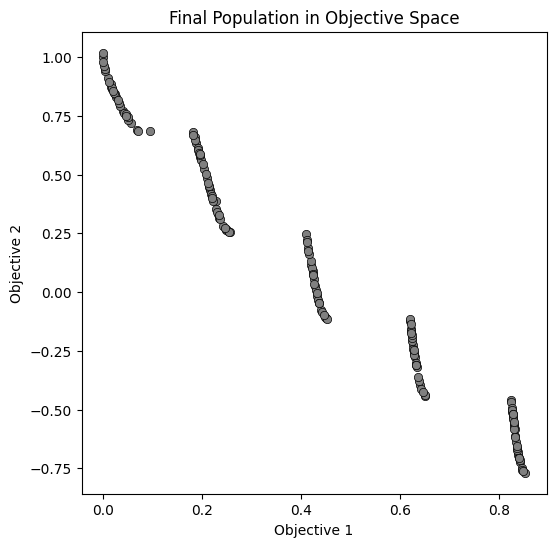

In [22]:
# Instantiate class NSGA2() and class ZDT3()
problem = ZDT3()
optimizer = NSGA2(pop_size=150, prob_cross=0.9, dist_index_cross=20, prob_mut=0.1, prob=ZDT3())

# Use NSGA-II to solve the ZDT3 problem
[optimum_x, optimum_fx] = optimizer.run(problem, max_gen=500)

#-----------BEGIN-----------#
# TODO: Plot the final population `optimum_fx` in the objective space
#-----------END-----------#
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(optimum_fx[:, 0], optimum_fx[:, 1], c='gray', marker='o', edgecolor='black',
           linewidths=0.5)
plt.title('Final Population in Objective Space')
plt.xlabel('Objective 1')
plt.ylabel('Objective 2')
plt.show()

### TODO: Use NSGA-II to Solve a Real-World Problem: Crashworthiness Design of Vehicles (10 marks)

The automotive industry places great importance on structural optimization for crashworthiness. In a study by Liao et al. [2], the crashworthiness design of vehicles was modeled as a multi-objective optimization problem. The problem aims to minimize three objectives: weight ($f_1$), acceleration characteristics ($f_2$), and toe-board intrusion ($f_3$) of the vehicle design. The decision variables for the problem specify the thickness of five reinforced members around the frontal structure of the vehicle, respectively. You are required to use NSGA-II to optimize the following crashworthiness design problem.

- Number of objectives: 3
- Number of decision variables: 5

$$
\begin{aligned}
&\mathrm{minimize} \left\{\begin{aligned}
f_1(\mathbf{x})= \,& 1640.2823+2.3573285 x_1+2.3220035 x_2 \\
& +4.5688768 x_3+7.7213633 x_4 +4.4559504 x_5\\
f_2(\mathbf{x})= \,& 6.5856+1.15 x_1-1.0427 x_2+0.9738 x_3 \\
& +0.8364 x_4-0.3695 x_1 x_4+0.0861 x_1 x_5 \\
& +0.3628 x_2 x_4-0.1106 x_1^2-0.3437 x_3^2 \\
& +0.1764 x_4^2\\
f_3(\mathbf{x})= & -0.0551+0.0181 x_1+0.1024 x_2 \\
& +0.0421 x_3-0.0073 x_1 x_2+0.024 x_2 x_3 \\
& -0.0118 x_2 x_4-0.0204 x_3 x_4-0.008 x_3 x_5 \\
& -0.0241 x_2^2+0.0109 x_4^2\\
\end{aligned}\right., \\
& \mathrm{where} \enspace  1 \leq x_i \leq 3, \enspace i=1,\ldots,5.
\end{aligned}
$$


[2] Liao, X., Li, Q., Yang, X., Zhang, W., & Li, W. (2008). Multiobjective optimization for crash safety design of vehicles using stepwise regression model. Structural and multidisciplinary optimization, 35, 561-569.

Your task is to **instantiate the NSGA2() and CrashworthinessDesign() classes, use NSGA-II to solve the problem, obtain the final population, and visualize the final population**. 

You can refer to the example figures below for reference. The left figure displays the Pareto front approximated by combining solutions obtained by several state-of-the-art algorithms, and the right figure displays the final population obtained by NSGA-II. Your expected solutions should be similar to the right figure.

<div style="display: flex;">
    <img src="https://github.com/linjunhe/CEG5302-Projects/blob/main/PF_crash.png?raw=true" alt="PF of crash" style="width: 40%;">
    <img src="https://github.com/linjunhe/CEG5302-Projects/blob/main/NSGA2_crash.png?raw=true" alt="NSGA2 on crash" style="width: 40%;">
</div>

Note that while NSGA-II provides solutions that are in close proximity to the Pareto front, indicating good convergence, these solutions are not evenly distributed across the Pareto front. **What are the reasons behind the poor distribution of solutions obtained by NSGA-II? Do you have any suggestions for improving NSGA-II performance on this problem? Please share your thoughts and suggestions.**


In [23]:
class CrashworthinessDesign():

    def __init__(self):
        self.name = 'Crashworthiness design of vehicles'
        self.n_obj = 3
        self.n_var = 5

        self.lower = np.full(self.n_var, 1.0)
        self.upper = np.full(self.n_var, 3.0)

    def evaluate(self, x):
        pop_size = len(x)
        f = np.zeros((pop_size, self.n_obj))

        x1 = x[:, 0]
        x2 = x[:, 1]
        x3 = x[:, 2]
        x4 = x[:, 3]
        x5 = x[:, 4]

        f[:, 0] = 1640.2823 + (2.3573285 * x1) + (2.3220035 * x2) + (
            4.5688768 * x3) + (7.7213633 * x4) + (4.4559504 * x5)
        f[:, 1] = 6.5856 + (1.15 * x1) - (1.0427 * x2) + (0.9738 * x3) + (
            0.8364 * x4) - (0.3695 * x1 * x4) + (0.0861 * x1 * x5) + (
                0.3628 * x2 * x4) - (0.1106 * x1 * x1) - (0.3437 * x3 * x3) + (
                    0.1764 * x4 * x4)
        f[:, 2] = -0.0551 + (0.0181 * x1) + (0.1024 * x2) + (0.0421 * x3) - (
            0.0073 * x1 * x2) + (0.024 * x2 * x3) - (0.0118 * x2 * x4) - (
                0.0204 * x3 * x4) - (0.008 * x3 * x5) - (0.0241 * x2 * x2) + (
                    0.0109 * x4 * x4)

        return f

In [24]:
# Create an instance of the crashworthiness design problem
prob = CrashworthinessDesign()
print(f"Problem = {prob.name}")
print(f"Number of objectives = {prob.n_obj}")
print(f"Number of variables = {prob.n_var}")
print(f"Lower bounds = {prob.lower}")
print(f"Upper bounds = {prob.upper}")

Problem = Crashworthiness design of vehicles
Number of objectives = 3
Number of variables = 5
Lower bounds = [1. 1. 1. 1. 1.]
Upper bounds = [3. 3. 3. 3. 3.]


In [25]:
# Initialize a population with 5 solutions and evaluate them
pop_size = 5
x = prob.lower + (prob.upper - prob.lower) * np.random.rand(
    pop_size, prob.n_var)
print("x = ", x)

f = prob.evaluate(x)
print(f"f(x) = {f}")

x =  [[2.47166554 1.72645466 2.17749749 2.17488943 1.66917561]
 [2.25543046 2.2199415  1.55875126 1.13810727 2.14453537]
 [1.75270941 1.39061029 1.22183093 2.07942072 2.6923144 ]
 [1.88427873 1.25877161 1.42999767 1.12631695 1.74425517]
 [2.9981636  1.65913734 2.82961793 1.50824287 2.79542792]]
f(x) = [[1.68429725e+03 9.82763417e+00 1.26902614e-01]
 [1.67621923e+03 8.54981835e+00 1.27771142e-01]
 [1.68127819e+03 1.00988640e+01 8.17058820e-02]
 [1.67064954e+03 8.91600873e+00 1.00093002e-01]
 [1.68823263e+03 8.93427601e+00 1.43134022e-01]]


In [27]:
#-----------BEGIN-----------#
# TODO: 
#   1. Instantiate class NSGA2() and class CrashworthinessDesign()
#   2. Use NSGA-II to solve the crashworthiness design problem
#   3. Plot the final population `optimum_fx` in the objective space
#   4. Share your thoughts on the questions above.
#-----------END-----------#

# Create problem and optimizer instances
prob_crash = CrashworthinessDesign()
optimizer_crash = NSGA2(prob=prob_crash, pop_size=200, prob_cross=0.9, dist_index_cross=20, prob_mut=0.1)

# Run NSGA-II (use a moderate number of generations for demonstration)
# You can increase max_gen for better convergence when running on your machine
optimum_x_crash, optimum_fx_crash = optimizer_crash.run(prob_crash, max_gen=200)

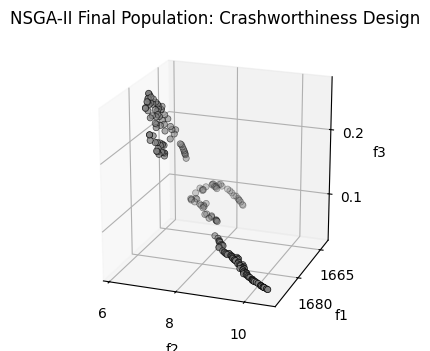

In [29]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(optimum_fx_crash[:, 1],  # f2: accel
           optimum_fx_crash[:, 0],  # f1: weight
           optimum_fx_crash[:, 2],  # f3: intrusion
           c='gray', edgecolor='black', linewidths=0.5)

ax.set_xlabel('f2', labelpad=5)
ax.set_ylabel('f1', labelpad=5)
ax.set_zlabel('f3', labelpad=5)
ax.invert_xaxis()
ax.xaxis.set_major_locator(plt.MaxNLocator(3))
ax.yaxis.set_major_locator(plt.MaxNLocator(3))
ax.zaxis.set_major_locator(plt.MaxNLocator(3))
ax.set_title('NSGA-II Final Population: Crashworthiness Design')
ax.view_init(elev=20, azim=110)
ax.set_box_aspect([1, 1, 1])
plt.subplots_adjust(left=0, right=0.5, bottom=0, top=1)
plt.show()


### Introduction to a Constrained Optimization Problem: MW7

The MW test suite [3] is a constrained multi-objective optimization test suite proposed by Zhongwei Ma and Yong Wang. It is designed to evaluate the performance of constrained multi-objective optimization algorithms. MW7 is one of the test problems in the MW test suite. We have implemented the MW7() class and provided examples on how to use it below.

- Number of objectives: 2
- Number of decision variables: 15
- Number of constraints: 2

$$
\begin{aligned}
&\mathrm{minimize} \left\{
\begin{array}{l}
f_1(\mathbf{x})=g_3(\mathbf{x}) x_1 \\
f_2(\mathbf{x})=g_3(\mathbf{x}) \sqrt{1-\left(f_1(\mathbf{x}) / g_3(\mathbf{x})\right)^2}
\end{array}\:,\right. \\
&\mathrm{subject~to} \enspace c_1(\mathbf{x})=\left(1.2+0.4 \sin (4 l)^{16}\right)^2-(f_1(\mathbf{x}))^2-(f_2(\mathbf{x}))^2 \geq 0,\\
& \qquad \qquad c_2(\mathbf{x})=(f_1(\mathbf{x}))^2 + (f_2(\mathbf{x}))^2 - \left(1.15 - 0.2 \sin (4 l)^8\right)^2 \geq 0,\\
&\mathrm{where} \enspace g_3(\mathbf{x})=1+\sum_{i=m}^n 2\left(x_i+\left(x_{i-1}-0.5\right)^2-1\right)^2, \\
& \qquad \enspace l=\arctan \left(f_2(\mathbf{x}) / f_1(\mathbf{x})\right),\\
& \qquad \enspace 0 \leq x_i \leq 1, \enspace i=1,\ldots,n,.
\end{aligned}
$$


[3] Ma, Z., & Wang, Y. (2019). Evolutionary constrained multiobjective optimization: Test suite construction and performance comparisons. IEEE Transactions on Evolutionary Computation, 23(6), 972-986.

In [ ]:
class MW7():

    def __init__(self):
        self.name = 'MW7'
        self.n_obj = 2  # number of objectives
        self.n_var = 15  # number of decision variables
        self.n_con = 2  # number of constraints

        self.lower = np.zeros(self.n_var)
        self.upper = np.ones(self.n_var)

    def evaluate(self, x):
        pop_size = len(x)
        f = np.zeros((pop_size, self.n_obj))
        c = np.zeros((pop_size, self.n_con))

        g3 = 1 + 2.0 * np.sum((x[:, self.n_obj - 1:] +
                               (x[:, self.n_obj - 2:-1] - 0.5)**2 - 1.0)**2,
                              axis=1)

        f[:, 0] = g3 * x[:, 0]
        f[:, 1] = g3 * (1 - (f[:, 0] / g3)**2)**0.5

        with np.errstate(divide='ignore'):
            l = np.arctan(f[:, 1] / f[:, 0])

        c[:, 0] = (1.2 + 0.4 * (np.sin(4 * l))**16)**2 - f[:, 0]**2 - f[:, 1]**2
        c[:, 1] = f[:, 0]**2 + f[:, 1]**2 - (1.15 - 0.2 * (np.sin(4 * l))**8)**2
        c = np.where(c < 0, -c, 0)  # the degree of constraint violation of x at each constraint

        return f, c

In [ ]:
# Create an instance of MW7
prob = MW7()
print(f"Problem = {prob.name}")
print(f"Number of objectives = {prob.n_obj}")
print(f"Number of variables = {prob.n_var}")
print(f"Number of constraints = {prob.n_con}")
print(f"Lower bounds = {prob.lower}")
print(f"Upper bounds = {prob.upper}")

Problem = MW7
Number of objectives = 2
Number of variables = 15
Number of constraints = 2
Lower bounds = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Upper bounds = [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
# Initialize a population with 1 solution and evaluate it
pop_size = 1
x = prob.lower + (prob.upper - prob.lower) * np.random.rand(
    pop_size, prob.n_var)
print("x = ", x)

f, c = prob.evaluate(x)
print(f"f(x) = {f}")
print(f"c(x) = {c}")
print(f"CV(x) = {np.sum(c, axis=1, keepdims=True)}")  # Constraint Violation

x =  [[0.98223    0.05265077 0.37592118 0.71430607 0.1627022  0.27878865
  0.17246878 0.99363713 0.55883413 0.06479593 0.41939231 0.08445647
  0.7138302  0.48901278 0.3261001 ]]
f(x) = [[10.69702672  2.04395192]]
c(x) = [[117.1618402   0.       ]]
CV(x) = [[117.1618402]]


In [ ]:
# Initialize a population with 2 solution and evaluate them
pop_size = 2
x = prob.lower + (prob.upper - prob.lower) * np.random.rand(
    pop_size, prob.n_var)
print("x = ", x)

f, c = prob.evaluate(x)
print(f"f(x) = {f}")
print(f"c(x) = {c}")
print(f"CV(x) = {np.sum(c, axis=1, keepdims=True)}")

x =  [[0.11667392 0.3626665  0.01693446 0.01555495 0.60595028 0.33303698
  0.37329449 0.58656737 0.44796405 0.2941927  0.36179951 0.05813664
  0.51350125 0.69049454 0.8945015 ]
 [0.80639018 0.06086252 0.80195737 0.25279629 0.96064112 0.35139587
  0.53485097 0.70868292 0.5047606  0.71772586 0.75757204 0.27294329
  0.73493836 0.11723229 0.80769897]]
f(x) = [[ 1.25749078 10.704213  ]
 [ 5.81743705  4.26634464]]
c(x) = [[114.72145625   0.        ]
 [ 50.60413984   0.        ]]
CV(x) = [[114.72145625]
 [ 50.60413984]]


### TODO: Implement Constrained NSGA-II and Solve MW7 (30 marks)
Your task is to **implement the parameter-less constraint handling technique in NSGA-II and use the constrained NSGA-II to solve the MW7 problem**.

You can refer to the example figures below for reference. The left figure (from [3]) displays the true Pareto front (represented by red points), the unconstrained Pareto front (represented by the blue line), and the feasible region (represented by the gray region). The right figure displays the final population obtained by NSGA-II. Your expected solutions should be similar to the gray circles in the right figure.

<div style="display: flex;">
    <img src="https://github.com/linjunhe/CEG5302-Projects/blob/main/PF_MW7.png?raw=true" alt="PF of MW7" style="width: 40%;">
    <img src="https://github.com/linjunhe/CEG5302-Projects/blob/main/NSGA2_MW7.png?raw=true" alt="NSGA2 on MW7" style="width: 40%;">
</div>

Note that sometimes the solutions obtained by NSGA-II may not cover all segments of the Pareto front (as shown below). **What are the possible reasons? Please share your thoughts in your report.**

<div style="display: flex;">
    <img src="https://github.com/linjunhe/CEG5302-Projects/blob/main/NSGA2_MW7_2.png?raw=true" alt="NSGA2 on MW7 2" style="width: 40%;">
    <img src="https://github.com/linjunhe/CEG5302-Projects/blob/main/NSGA2_MW7_3.png?raw=true" alt="NSGA2 on MW7 3" style="width: 40%;">
</div>

In [ ]:
class CNSGA2():
    #-----------BEGIN-----------#
    # TODO: Implement the parameter-less constraint handling technique in NSGA-II
    #-----------END-----------#

_IncompleteInputError: incomplete input (3067829059.py, line 4)

In [ ]:
#-----------BEGIN-----------#
# TODO: 
#   1. Instantiate class CNSGA2() and class MW7()
#   2. Use NSGA-II with a contraint handling technique to solve the MW7 problem
#   3. Plot the final population `optimum_fx` in the objective space
#   4. In your report, answer the questions like: What are the possible reasons why the solutions 
#      obtained by NSGA-II fail to cover all segments of the Pareto front?
#-----------END-----------#

### TODO: Use Constrained NSGA-II to Solve the Assigned Constrained Multi-objective Optimization Problem (30 marks)

You will be assigned one constrained multi-objective problem (refer to the provided [Google Sheet file](https://docs.google.com/spreadsheets/d/16YdUPUa9-odsxajJ2FukP3yenpzy3Wl2gUPET8h2TDo/edit?usp=sharing) that you are required to solve using the constrained NSGA-II algorithm. 

Your task is to **implement the problem class** and **apply the constrained NSGA-II algorithm** to solve the given problem. Additionally, you need to perform parameter analysis to determine the optimal parameter settings for the algorithm, and discuss how the algorithm's parameters affect its performance. 

Finally, you should present your best results and provide some discussion.

Kumar, A., Wu, G., Ali, M. Z., Luo, Q., Mallipeddi, R., Suganthan, P. N., & Das, S. (2021). A benchmark-suite of real-world constrained multi-objective optimization problems and some baseline results. Swarm and Evolutionary Computation, 67, 100961.

In [ ]:
#-----------BEGIN-----------#
# TODO:
#   1. Implement the problem class for the assigned RCMx real-world problem
#   2. Instantiate the CNSGA2() class and the problem class
#   3. Use the constrained NSGA-II algorithm to solve the problem with a range of parameter settings
#   4. Analyze the performance of the algorithm with different parameter settings, including the 
#      population size, crossover and mutation probabilities, and maximum number of generations
#   5. Plot the final population `optimum_fx` in the objective space  using the best 
#      parameter settings that you found in Step 4.
#-----------END-----------#